In [1]:
%pylab inline

import os
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


In [4]:
idir = os.path.expandvars("$phd/inputs/real_deal/fits")
odir = os.path.expandvars("$phd/inputs/real_deal/outs/spec")

fits_list = sorted([file for root, subs, files in os.walk(idir) for file in files if file.endswith(".fit")])

spec_mod = genfromtxt("{}/dynbas_output.log".format(odir), dtype=None, names=True)

print len(fits_list), spec_mod.size


12933 12933


In [9]:
f = fits.open("{}/{}".format(idir,fit))
f[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3846                                                  
NAXIS2  =                    5                                                  
EXTEND  =                    T /                                                
TAI     =        4716777628.69 / 1st row Number of seconds since Nov 17 1858    
RA      =            233.89475 / 1st row RA of telescope boresight (deg)        
DEC     =            15.189626 / 1st row Dec of telescope boresight (degrees)   
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
AZ      =        345.592120000 / 1st row Azimuth (encoder) of tele (0=N?) (deg) 
ALT     =        71.63859566

In [16]:
mask = ones(spec_mod.size, dtype=np.bool)
LOSVD_obs = []
LOSVD_mod = sqrt(spec_mod["LOSVD_mod"]**2)

for i, fit in enumerate(fits_list):
    f = fits.open("{}/{}".format(idir,fit))
    
    if f[0].header["VEL_DIS"]<=0:
        mask[i] = False
        continue
    
    LOSVD_obs.append(f[0].header["VEL_DIS"])
    
LOSVD_obs = array(LOSVD_obs)

(array([ 3099.,  3036.,  2764.,  1774.,  1270.,   504.,   316.,    94.,
           61.,    15.]),
 array([  40.   ,   80.995,  121.99 ,  162.985,  203.98 ,  244.975,
         285.97 ,  326.965,  367.96 ,  408.955,  449.95 ]),
 <a list of 10 Patch objects>)

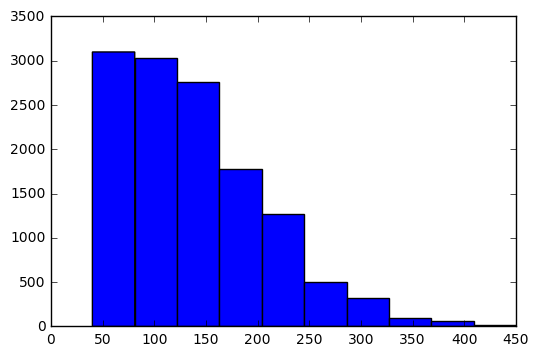

In [19]:
hist(LOSVD_mod)

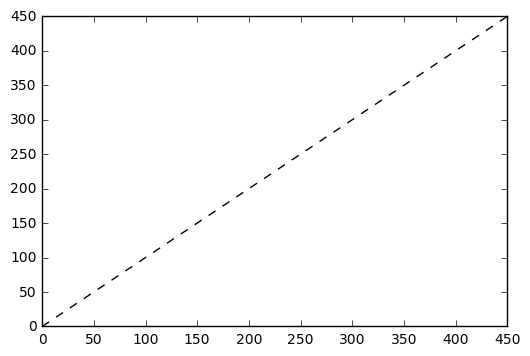

In [11]:
plot(LOSVD_obs, LOSVD_mod[mask], ".r")
plot([0,450], [0,450], "--k")